## Migration Data Analysis - Romania and Top 5 Countries

For this assignment, we have selected data related to migration from the United Nations database, which is publicly available and free to use.

From this dataset, we will be looking at migration patterns specific to Romania as well as the top 5 countries from the perspective of immigration.

As per UN data disclaimer, I am including here the suggested citation: 
United Nations, Department of Economic and Social Affairs, Population Division (2015).

We will begin by importing pandas

In [1]:
import pandas as pd

In order to download and import the migration data from the UN website, we will be using the read_excel() method. This requires a module called xlrd. We need to run the following line of code to install the xlrd module:

In [2]:
!conda install -c anaconda xlrd --yes

Solving environment: done

# All requested packages already installed.



Now we can use the read_excel() method to read the data. When looking at the xlsx file, we notice that the first 16 lines are a UN specific header and the data starts from row 18, with the header being on row 17. We will be using the skiprows parameter for the read_excel function, which removes these rows.

In [3]:
df_migration = pd.read_excel('https://www.un.org/en/development/desa/population/migration/data/empirical2/data/UN_MigFlow_Totals.xlsx',
                       sheet_name='Totals',
                       skiprows=range(16))

print ('Data read into a pandas dataframe!')

# uncomment this in case the download doesn't work, for whatever reason
# the file is provided within the submission
# df_migration = pd.read_excel('./UN_MigFlow_Totals.xlsx', sheet_name='Totals', skiprows=range(16))

Data read into a pandas dataframe!


Let's have a look at the first 10 rows in the data

In [4]:
df_migration.head(10)

,CntName,Criteria,Type,Coverage,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Armenia,Residence,Emigrants,Both,..,..,..,..,..,..,...,8451,9303,8053,7461,6121,4100,..,..,..,..
1,Armenia,Residence,Immigrants,Both,..,..,..,..,..,..,...,1514,1497,1335,1112,864,861,..,..,..,..
2,Australia,Residence,Emigrants,Both,90860,85600,92340,100510,96360,93440,...,212200,206690,204800,216580,220280,..,..,..,..,..
3,Australia,Residence,Immigrants,Both,184290,212690,195200,153570,153530,172550,...,350990,363470,402210,460650,535970,..,..,..,..,..
4,Austria,Citizenship,Emigrants,Citizens,..,..,..,..,..,..,...,21703,20333,19387,17828,18168,16376,16059,14401,15443,15368
5,Austria,Citizenship,Emigrants,Foreigners,..,..,..,..,..,..,...,50018,49800,55045,32070,33395,36868,35592,36796,36369,38703
6,Austria,Citizenship,Immigrants,Citizens,..,..,..,..,..,..,...,18301,16470,15636,8477,8636,8988,8817,8082,8272,9237
7,Austria,Citizenship,Immigrants,Foreigners,..,..,..,..,..,..,...,104246,97995,82899,64385,65136,60307,62161,74148,83285,92629
8,Austria,Residence,Emigrants,Both,..,..,..,..,..,..,...,71721,70133,74432,49898,51563,53244,51651,51197,51812,54071
9,Austria,Residence,Immigrants,Both,..,..,..,..,..,..,...,122547,114465,98535,72862,73772,69295,70978,82230,91557,101866


and the last 10 rows of data:

In [5]:
df_migration.tail(10)

,CntName,Criteria,Type,Coverage,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
219,Ukraine,Citizenship,Immigrants,Foreigners,..,..,..,..,..,..,...,18513,18050,23528,..,..,..,..,..,..,..
220,Ukraine,Residence,Emigrants,Both,..,..,..,..,..,..,...,46182,34997,29982,..,..,..,..,..,..,..
221,Ukraine,Residence,Immigrants,Both,..,..,..,..,..,..,...,38567,39580,44227,..,..,..,..,..,..,..
222,United Kingdom of Great Britain and Northern I...,Citizenship,Emigrants,Citizens,..,..,..,..,..,..,...,183146,174270,196080,159339,172576,139805,136002,148729,142711,133576
223,United Kingdom of Great Britain and Northern I...,Citizenship,Emigrants,Foreigners,..,..,..,..,..,..,...,127243,154138,173390,158248,254631,228372,203304,201974,178506,183358
224,United Kingdom of Great Britain and Northern I...,Citizenship,Immigrants,Citizens,..,..,..,..,..,..,...,85460,89067,77306,71424,85081,95970,93321,78430,80196,76136
225,United Kingdom of Great Britain and Northern I...,Citizenship,Immigrants,Foreigners,..,..,..,..,..,..,...,432637,407403,451702,455290,505161,470544,497629,487614,417844,449910
226,United Kingdom of Great Britain and Northern I...,Residence,Emigrants,Both,..,..,..,..,..,..,...,310389,328408,369470,317587,427207,368177,339306,350703,321217,316934
227,United Kingdom of Great Britain and Northern I...,Residence,Immigrants,Both,173000,153000,201000,202000,201000,232000,...,518097,496469,529008,526714,590242,566514,590950,566044,498040,526046
228,United States of America,Place of birth,Immigrants,Foreigners,530639,596600,594131,559763,543903,570009,...,957883,1122257,1266129,1052415,1107126,1130818,1042625,1062040,1031631,990553


and some basic information about the data:

In [6]:
df_migration.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 38 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   CntName   229 non-null    object
 1   Criteria  229 non-null    object
 2   Type      229 non-null    object
 3   Coverage  229 non-null    object
 4   1980      229 non-null    object
 5   1981      229 non-null    object
 6   1982      229 non-null    object
 7   1983      229 non-null    object
 8   1984      229 non-null    object
 9   1985      229 non-null    object
 10  1986      229 non-null    object
 11  1987      229 non-null    object
 12  1988      229 non-null    object
 13  1989      229 non-null    object
 14  1990      229 non-null    object
 15  1991      229 non-null    object
 16  1992      229 non-null    object
 17  1993      229 non-null    object
 18  1994      229 non-null    object
 19  1995      229 non-null    object
 20  1996      229 non-null    object
 21  1997      229 no

In [7]:
# size of dataframe (rows, columns)
df_migration.shape

(229, 38)

It looks like we have 229 rows of data and 38 columns, which include the emigrants and immigrant numbers for many of the countries, with each year on a distinct column. We can also see that we have numbers reported from 2 perspectives: Residence and Citizenship.
However, we notice an issue when we check the type of the column. We would expect the 1980 - 2013 columns to have numbers but they are of type "object". Let's convert these columns to the right type

In [8]:
# iterating through the list of columns which include yearly data
for column in list(df_migration)[4:38]:
    df_migration[column] = pd.to_numeric(df_migration[column], errors='coerce')

# checking the type of the data after conversion
df_migration.dtypes

CntName      object
Criteria     object
Type         object
Coverage     object
1980        float64
1981        float64
1982        float64
1983        float64
1984        float64
1985        float64
1986        float64
1987        float64
1988        float64
1989        float64
1990        float64
1991        float64
1992        float64
1993        float64
1994        float64
1995        float64
1996        float64
1997        float64
1998        float64
1999        float64
2000        float64
2001        float64
2002        float64
2003        float64
2004        float64
2005        float64
2006        float64
2007        float64
2008        float64
2009        float64
2010        float64
2011        float64
2012        float64
2013        float64
dtype: object

We can see that the type of the columns in now float64. Let's also rename the CntName column to Country:

In [9]:
df_migration.rename(columns={'CntName':'Country'}, inplace=True)
df_migration.head(5)

,Country,Criteria,Type,Coverage,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Armenia,Residence,Emigrants,Both,NaN,NaN,NaN,NaN,NaN,NaN,...,8451.0,9303.0,8053.0,7461.0,6121.0,4100.0,NaN,NaN,NaN,NaN
1,Armenia,Residence,Immigrants,Both,NaN,NaN,NaN,NaN,NaN,NaN,...,1514.0,1497.0,1335.0,1112.0,864.0,861.0,NaN,NaN,NaN,NaN
2,Australia,Residence,Emigrants,Both,90860.0,85600.0,92340.0,100510.0,96360.0,93440.0,...,212200.0,206690.0,204800.0,216580.0,220280.0,NaN,NaN,NaN,NaN,NaN
3,Australia,Residence,Immigrants,Both,184290.0,212690.0,195200.0,153570.0,153530.0,172550.0,...,350990.0,363470.0,402210.0,460650.0,535970.0,NaN,NaN,NaN,NaN,NaN
4,Austria,Citizenship,Emigrants,Citizens,NaN,NaN,NaN,NaN,NaN,NaN,...,21703.0,20333.0,19387.0,17828.0,18168.0,16376.0,16059.0,14401.0,15443.0,15368.0


 And let's add a Total column as well so that we can add together the data for all the years.

In [10]:
df_migration['Total'] = df_migration.sum(axis=1)
df_migration.head(5)

,Country,Criteria,Type,Coverage,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Armenia,Residence,Emigrants,Both,NaN,NaN,NaN,NaN,NaN,NaN,...,9303.0,8053.0,7461.0,6121.0,4100.0,NaN,NaN,NaN,NaN,86335.0
1,Armenia,Residence,Immigrants,Both,NaN,NaN,NaN,NaN,NaN,NaN,...,1497.0,1335.0,1112.0,864.0,861.0,NaN,NaN,NaN,NaN,14355.0
2,Australia,Residence,Emigrants,Both,90860.0,85600.0,92340.0,100510.0,96360.0,93440.0,...,206690.0,204800.0,216580.0,220280.0,NaN,NaN,NaN,NaN,NaN,4461160.0
3,Australia,Residence,Immigrants,Both,184290.0,212690.0,195200.0,153570.0,153530.0,172550.0,...,363470.0,402210.0,460650.0,535970.0,NaN,NaN,NaN,NaN,NaN,7965110.0
4,Austria,Citizenship,Emigrants,Citizens,NaN,NaN,NaN,NaN,NaN,NaN,...,20333.0,19387.0,17828.0,18168.0,16376.0,16059.0,14401.0,15443.0,15368.0,343360.0


In order to avoid confusions between the row index selection and the column names (e.g. the year 1980 with the row 1980), let's convert the column names to strings, so '1980' to '2013', instead of 1980 to 2013.

In [11]:
df_migration.columns = list(map(str, df_migration.columns))

Now, when we use '2013' for column name, we get what we were expecting, the data for the year 2013:

In [12]:
df_migration['2013']

0           NaN
1           NaN
2           NaN
3           NaN
4       15368.0
         ...   
224     76136.0
225    449910.0
226    316934.0
227    526046.0
228    990553.0
Name: 2013, Length: 229, dtype: float64

Let's see how many different countries we have in the dataset

In [13]:
print(len(df_migration['Country'].unique()))

45


Now, let's create a condition so that we can select the records which refer to emigrants from Romania, reported by Residence

In [14]:
condition1 = (df_migration['Country'] == 'Romania') & \
(df_migration['Criteria'] == 'Residence') & \
(df_migration['Type'] == 'Emigrants')

We can now use this condition to select the records in the dataframe

In [15]:
df_migration[condition1]

,Country,Criteria,Type,Coverage,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
174,Romania,Residence,Emigrants,Both,NaN,NaN,NaN,NaN,NaN,NaN,...,13297.0,16672.0,11999.0,302796.0,246626.0,197985.0,195551.0,170186.0,161755.0,1689077.0


Now we will import matplotlib and plot a chart using this data

In [16]:
# we are using the inline backend
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

In [17]:
# mapping the range of years to a variable to that we can use it several times
years = list(map(str, range(1980, 2014)))

In [18]:
romania = df_migration.loc[174, years] # selecting period 1980 - 2013
romania

1980         NaN
1981         NaN
1982         NaN
1983         NaN
1984         NaN
1985         NaN
1986         NaN
1987         NaN
1988         NaN
1989         NaN
1990     96929.0
1991     44160.0
1992     31152.0
1993     18446.0
1994     17146.0
1995     25675.0
1996     21526.0
1997     19945.0
1998     17536.0
1999     12594.0
2000     14753.0
2001     12738.0
2002     10814.0
2003     12744.0
2004     16052.0
2005     13297.0
2006     16672.0
2007     11999.0
2008    302796.0
2009    246626.0
2010    197985.0
2011    195551.0
2012    170186.0
2013    161755.0
Name: 174, dtype: object

<AxesSubplot:>

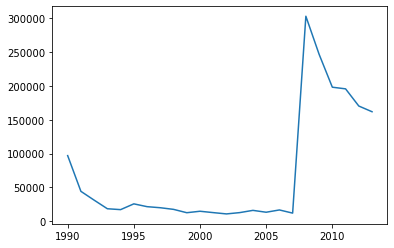

In [19]:
romania.plot()

We cannot really tell by looking at the chart what the numbers represent so let's add some values for the chart title and for the axis labels

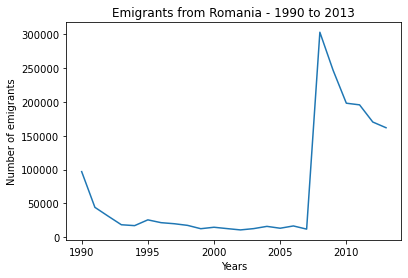

In [20]:
romania.plot(kind='line')

plt.title('Emigrants from Romania - 1990 to 2013')
plt.ylabel('Number of emigrants')
plt.xlabel('Years')

plt.show() # this line is required to display all the changes we made

We notice a big spike in 2007, which is when Romania joined the European Union and many people moved to other EU countries to seek employment.

Now let's compare immigration and emigration:

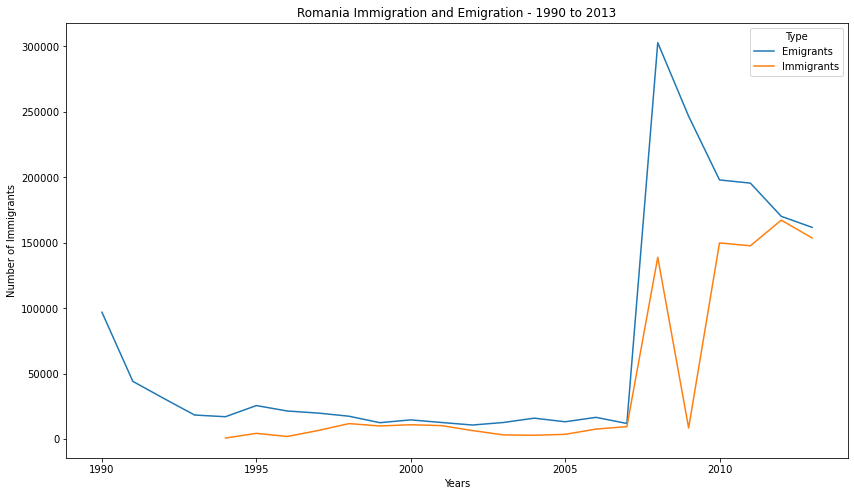

In [21]:
# creating new condition to filter the records we are interested in
# this time we will select all types of migration
condition2 = (df_migration['Country'] == 'Romania') & (df_migration['Criteria'] == 'Residence')

# applying the condition as a filter on the initial dataframe
df_romania = df_migration[condition2]

# setting the index of the new dataframe to the Type attribute, so that we can plot it in the chart
df_romania.set_index('Type', inplace=True)

# need to transpose the data so that we can display years on the axis for multiple columns
df_romania = df_romania[years].transpose() 

# plot type and size of the figure
df_romania.plot(kind='line', figsize=(14, 8))

plt.title('Romania Immigration and Emigration - 1990 to 2013')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

We can see that immigration to Romania also increased when Romania joined the EU but not nearly as much. However, it continued to increase and in 2013, reached a similar level, which means the net balance from migration was almost neutral.

Now let's create a new condition to focus on immigrants to multiple countries

In [22]:
condition3 = (df_migration['Criteria'] == 'Residence') & \
(df_migration['Type'] == 'Immigrants') & \
(df_migration['Coverage'] == 'Both')

We will sort the dataframe in descending order based on the Total column, then filter to the top 5 values using head() and display the data in a line chart.

/Users/Ionut/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


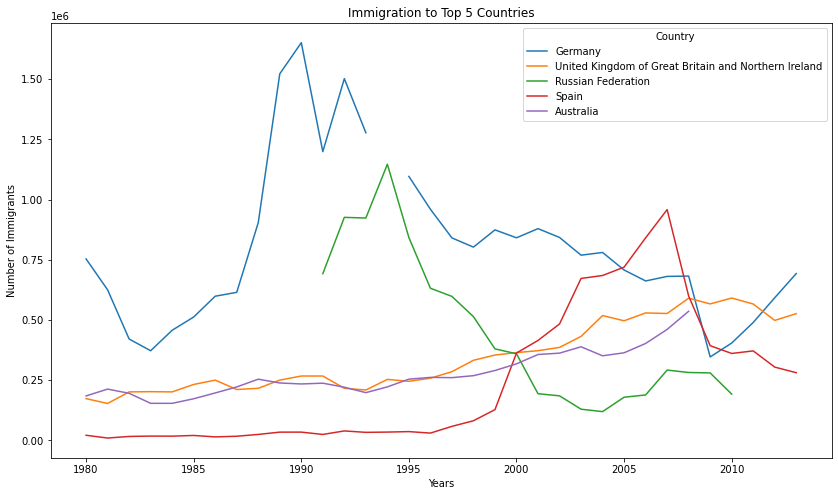

In [23]:
# sorting the dataframe using the Total column that we added
# sorting in descending order will place the highest values at the top
df_migration.sort_values(by='Total', ascending=False, axis=0, inplace=True)

# we can now select the top 5 files by simply using head(5)
df_top5 = df_migration[condition3].head(5)

# setting the index of the dataframe to Country so that we can use in the chart
df_top5.set_index('Country', inplace=True)

# transposing the dataset to be able to display years as the horizontal axis
df_top5 = df_top5[years].transpose() 

# plot type and size
df_top5.plot(kind='line', figsize=(14, 8))

plt.title('Immigration to Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

In [24]:
# calculating average value for each of the 5 countries
df_top5.mean()

Country
Germany                                                 798528.212121
United Kingdom of Great Britain and Northern Ireland    345222.176471
Russian Federation                                      452533.850000
Spain                                                   239166.088235
Australia                                               274658.965517
dtype: float64

It is surprising to see that the United States of America is not appearing in the top 5 so let's see if the data is in the dataframe.

In [25]:
df_usa = df_migration[df_migration['Country']=='United States of America']
df_usa

,Country,Criteria,Type,Coverage,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
228,United States of America,Place of birth,Immigrants,Foreigners,530639.0,596600.0,594131.0,559763.0,543903.0,570009.0,...,1122257.0,1266129.0,1052415.0,1107126.0,1130818.0,1042625.0,1062040.0,1031631.0,990553.0,30536689.0


It appears to be in there so let's see what the average value is for USA.

In [26]:
# We can calculate the average like this
df_usa[years].transpose().mean()

228    898137.911765
dtype: float64

The average is clearly higher than any of the 5 countries we have in the dataset. However, the issue seems to be that USA uses a different Criteria, called "Place of birth", when reporting the numbers. Let's see if there are other countries, which use the same criteria.

In [27]:
df_migration[df_migration['Criteria']=='Place of birth'].head()

,Country,Criteria,Type,Coverage,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
228,United States of America,Place of birth,Immigrants,Foreigners,530639.0,596600.0,594131.0,559763.0,543903.0,570009.0,...,1122257.0,1266129.0,1052415.0,1107126.0,1130818.0,1042625.0,1062040.0,1031631.0,990553.0,30536689.0


It seems that USA is the only such country. Let's update the condition and redo the chart, to include USA in the top 5.

In [28]:
# new condition to include the United States of America
condition4 = ((df_migration['Criteria'] == 'Residence') & \
(df_migration['Type'] == 'Immigrants') & \
(df_migration['Coverage'] == 'Both')) | \
(df_migration['Country'] == 'United States of America')

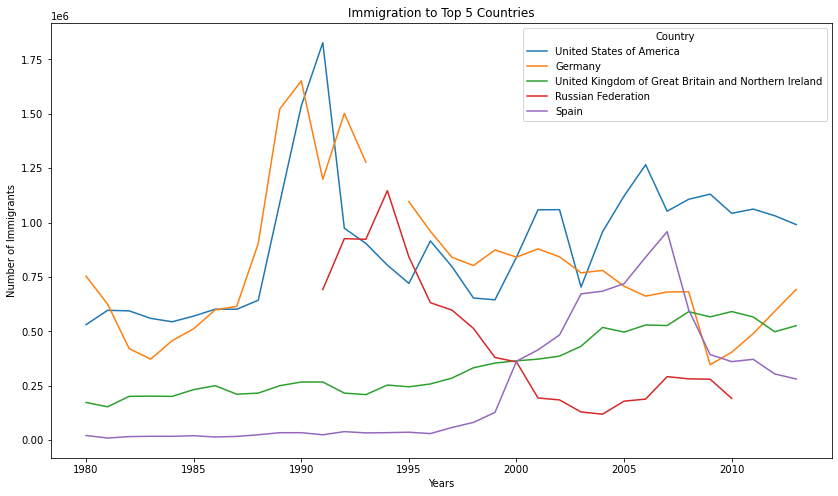

In [29]:
df_migration.sort_values(by='Total', ascending=False, axis=0, inplace=True)

df_top5 = df_migration[condition4].head(5)
df_top5.set_index('Country', inplace=True)
df_top5 = df_top5[years].transpose() 

df_top5.plot(kind='line', figsize=(14, 8))

plt.title('Immigration to Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

Now we can also see United States of America on the list, with some of the highest values historically.

Limitations: 
1. This dataset does not offer insight into which countries immigration came from, which would be important in order to understand certain spikes in the data. For example, we could assume that migration to the United States around 1990 (which seems to be correlated with Germany around that period) spiked as a result of the fall of communism but we would need additional detail to support this.
2. The available data stop at 2013, which is rather old. More recent data would be required in order to understand how the top 5 looks like. For example, the impact of the war in Syria is not accounted for in the data, yet we know that massive migration patterns were caused as a result.